# Detecting and cropping the face from the image.


960
1280
1000
1333.3333333333335


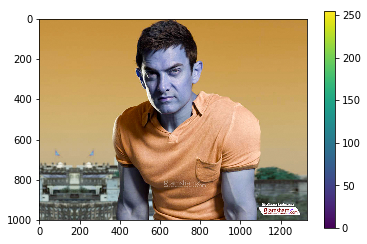

299


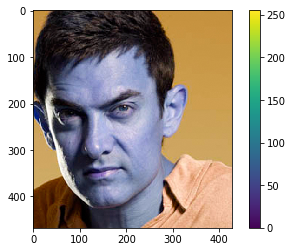

True

In [27]:
import numpy as np
from imutils import face_utils
import cv2 as cv
import imutils
from matplotlib import pyplot as plt
import dlib
import os

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

img = cv.imread('Input Images/amir3.jpg')
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
#res = img
ht,wt,c = img.shape
print(ht)
print(wt)
wt=wt*(1000/ht)
ht=1000
print(ht)
print(wt)
res = cv.resize(img,(int(wt),int(ht)), interpolation = cv.INTER_CUBIC)
plt.imshow(res),plt.colorbar(),plt.show()
mask = np.zeros(res.shape[:2],np.uint8)
gray = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
rects = detector(gray,1)

roi = rects[0] # region of interest
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)

jawline = shape[6:12]

img2 = cv.imread('Input Images/amir3.jpg')
height, width = img2.shape[:2]

#res = cv.resize(img,(210,250), interpolation = cv.INTER_CUBIC)
print(shape[28][1])
newimg = res[int(shape[28][1] - ((shape[9][1]-shape[28][1]) * 1.5)):shape[9][1]+50, shape[3][0] - (shape[29][0]-shape[3][0]):shape[14][0] + (shape[14][0]-shape[29][0])]
plt.imshow(newimg),plt.colorbar(),plt.show()
cv.imwrite("crop.png",newimg)

# Applying Grabcut function for image segmentation (removing the background) 


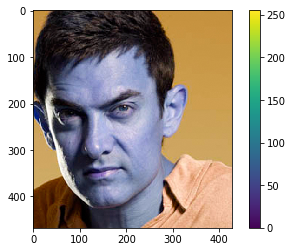

428
468


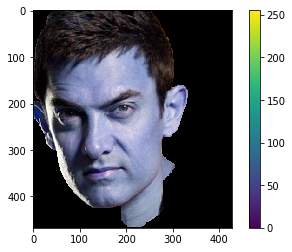

True

In [28]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('FinalSubmission/Input Images/self.jpg')
img = cv.imread('crop.png')
plt.imshow(img),plt.colorbar(),plt.show()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (1,1,img.shape[1]-3,img.shape[0]-3)
print(img.shape[1])
print(img.shape[0])

#res=img
#cv.rectangle(res,(0,0),(1500,1500),(0,255,0),2)
#cv.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,20,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()
cv.imwrite("removed_Background.png",img)

# Jawline Detection and cropping the lower part

In [29]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import os
from matplotlib import pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# load image
img = cv2.imread('removed_Background.png')
h, w, ch = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# add an alpha channel to image
b,g,r = cv2.split(img);
a = np.ones((h,w,1), np.uint8) * 255
img = cv2.merge((b, g, r, a))
# detect face
rects = detector(gray,1)
roi = rects[0] # region of interest
shape = predictor(gray, roi)
shape = face_utils.shape_to_np(shape)
# extract jawline
jawline = shape[4:14]
top = min(jawline[:,1])
bottom = max(jawline[:,1])
# extend contour for masking
jawline = np.append(jawline, [ w-1, jawline[-1][1] ]).reshape(-1, 2)
jawline = np.append(jawline, [ w-1, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, h-1 ]).reshape(-1, 2)
jawline = np.append(jawline, [ 0, jawline[0][1] ]).reshape(-1, 2)
contours = [ jawline ]
# generate mask
mask = np.ones((h,w,1), np.uint8) * 255 # times 255 to make mask 'showable'
cv2.drawContours(mask, contours, -1, 0, -1) # remove below jawline
# apply to image
result = cv2.bitwise_and(img, img, mask = mask)
#result = cv2.add(img,img, mask = mask)

#result = result[top:bottom, roi.left():roi.left()+roi.width()] # crop ROI
cv2.imwrite('blackBackground.png', result); 
#plt.imshow(result)


# Converting black background to transparent

In [30]:
import cv2
file_name = "blackBackground.png"
src = cv2.imread(file_name, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite("Final_Result.png", dst)

True